<a href="https://colab.research.google.com/github/Road2SKA/python_hpc_tutorial/blob/main/5_dask_parallel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parallelism with dask
Dask enables seamless, low-overhead parallel execution from laptops to large clusters, utilizing dynamic task scheduling to optimize performance for complex workloads. Dask is very useful for handling large datasets that exceed memory capacity.

Dask is **top-down parallelism**. You define the operation that you want, and dask will decide how to parallelize that operation.

In [33]:
import time
import numpy as np
import dask.array as da

In [26]:
# a simple example of an operation with numpy
a_np  = np.arange(100_000)
%time a_np_2 = (a_np**2).sum()

CPU times: user 0 ns, sys: 796 µs, total: 796 µs
Wall time: 984 µs


With dask, to take advantage of parallelism we need to define our “slices”. we do this by defining the amount of elements we want per block using the variable chunks

In [34]:
a_da = da.arange(100_000, chunks=10_000)
a_da

dask.array<arange, shape=(100000,), dtype=int64, chunksize=(10000,), chunktype=numpy.ndarray>

Now we define our operation

In [35]:
a_da_2 = (a_da**2).sum()
a_da_2

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

Then, to execute it we need to call dask.compute

In [36]:
a_da_2.compute()

np.int64(333328333350000)

Dask uses **task scheduling** to break the compute step into many medium-sized tasks or units of computation. We represent these tasks as nodes in a graph with edges between nodes if one task depends on data produced by another. We can visualize the task graph using the code below.

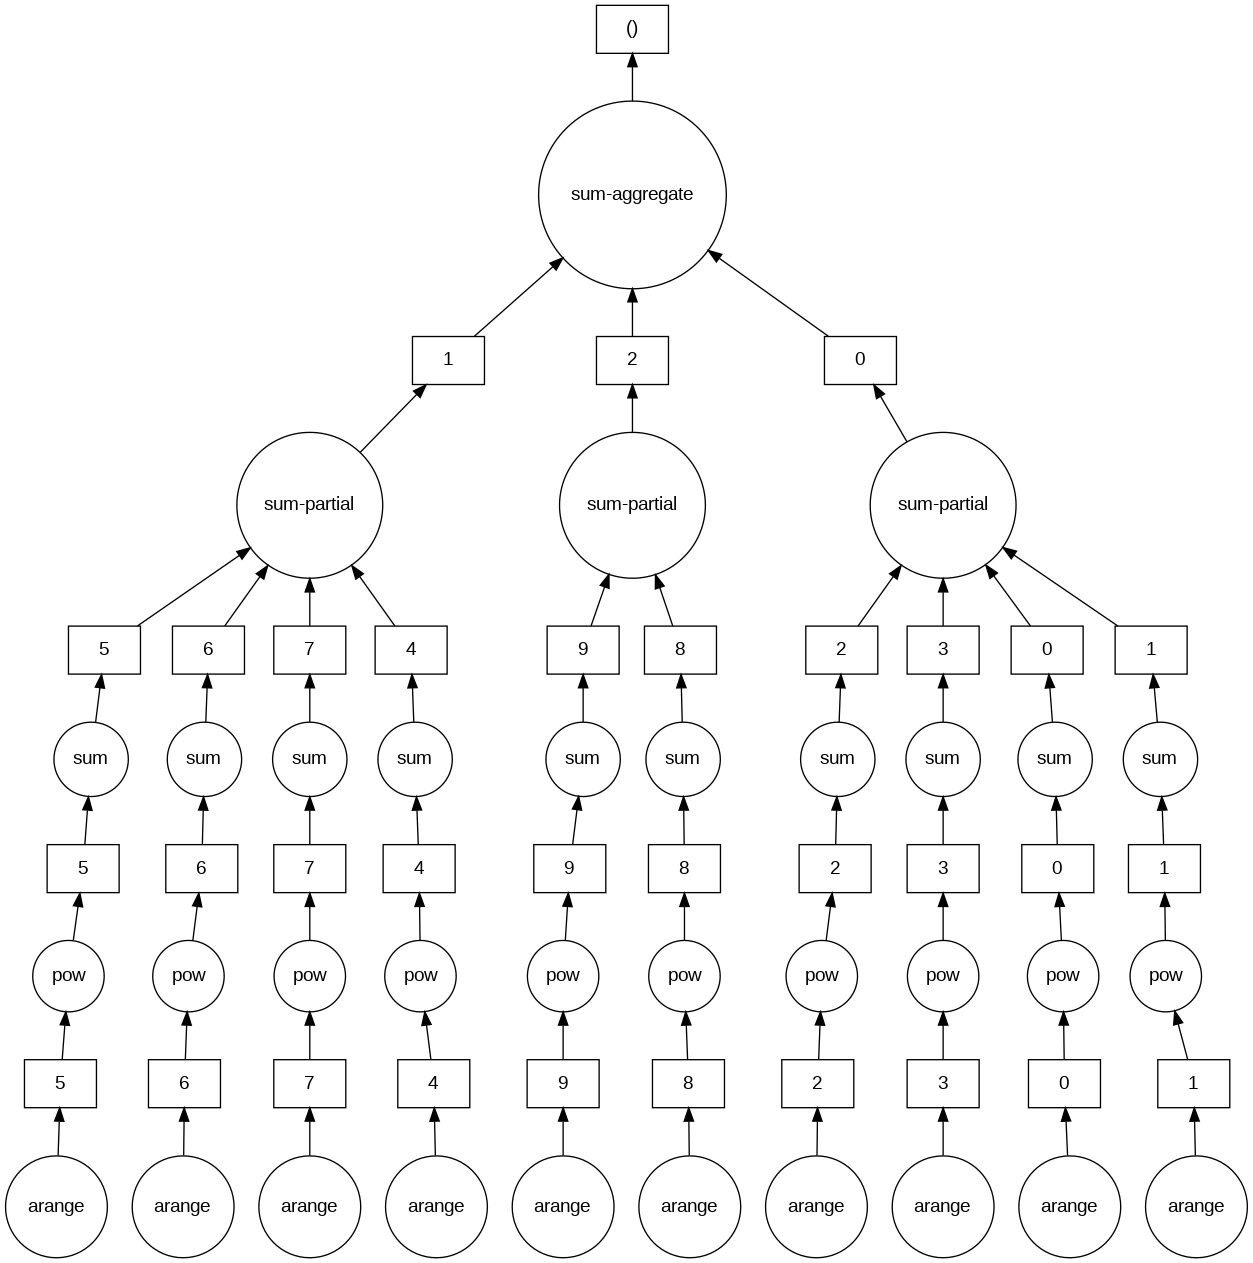

In [37]:
# visualize the low level Dask graph using cytoscape
a_da_2.visualize()

Let's compare the timing of these two methods.

In [39]:
%%time
a_np  = np.arange(100_000)
a_np_2 = (a_np**2).sum()

CPU times: user 1.76 ms, sys: 0 ns, total: 1.76 ms
Wall time: 1.35 ms


In [40]:
%%time
a_da = da.arange(100_000, chunks=10_000)
a_da_2 = (a_da**2).sum()
a_da_2.compute()

CPU times: user 18.3 ms, sys: 0 ns, total: 18.3 ms
Wall time: 19.3 ms


np.int64(333328333350000)

**Exercise 3**: write a script that compares the execution time in dask and numpy for different array sizes and dask chunk sizes. When does dask outperform numpy?